# Setup and Context

### Introduction

On November 27, 1895, Alfred Nobel signed his last will in Paris. When it was opened after his death, the will caused a lot of controversy, as Nobel had left much of his wealth for the establishment of a prize.

Alfred Nobel dictates that his entire remaining estate should be used to endow “prizes to those who, during the preceding year, have conferred the greatest benefit to humankind”.

Every year the Nobel Prize is given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace. 

<img src=https://i.imgur.com/36pCx5Q.jpg>

Let's see what patterns we can find in the data of the past Nobel laureates. What can we learn about the Nobel prize and our world more generally?

### Import Statements

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

### Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

### Read the Data

In [ ]:
df_data = pd.read_csv('nobel_prize_data.csv')

# Data Exploration & Cleaning

Preliminary data exploration. 
* What is the shape of `df_data`? How many rows and columns?
* What are the column names?
* In which year was the Nobel prize first awarded?
* Which year is the latest year included in the dataset?

In [ ]:
df_data.shape

(962, 16)

In [ ]:
df_data.dtypes

year                      int64
category                 object
prize                    object
motivation               object
prize_share              object
laureate_type            object
full_name                object
birth_date               object
birth_city               object
birth_country            object
birth_country_current    object
sex                      object
organization_name        object
organization_city        object
organization_country     object
ISO                      object
dtype: object

In [ ]:
df_data.tail()

year  category                                           prize  \
957  2020  Medicine  The Nobel Prize in Physiology or Medicine 2020   
958  2020     Peace                      The Nobel Peace Prize 2020   
959  2020   Physics                 The Nobel Prize in Physics 2020   
960  2020   Physics                 The Nobel Prize in Physics 2020   
961  2020   Physics                 The Nobel Prize in Physics 2020   

                                            motivation prize_share  \
957           “for the discovery of Hepatitis C virus”         1/3   
958  “for its efforts to combat hunger, for its con...         1/1   
959  “for the discovery of a supermassive compact o...         1/4   
960  “for the discovery of a supermassive compact o...         1/4   
961  “for the discovery that black hole formation i...         1/2   

    laureate_type                   full_name  birth_date  \
957    Individual            Michael Houghton  1949-07-02   
958  Organization  World Food Programme (WFP)         NaN   
959    Individual                 Andrea Ghez  1965-06-16   
960    Individual             Reinhard Genzel  1952-03-24   
961    Individual               Roger Penrose  1931-08-08   

                   birth_city             birth_country  \
957                       NaN            United Kingdom   
958                       NaN                       NaN   
959              New York, NY  United States of America   
960  Bad Homburg vor der Höhe                   Germany   
961                Colchester            United Kingdom   

        birth_country_current     sex         organization_name  \
957            United Kingdom    Male     University of Alberta   
958                       NaN     NaN                       NaN   
959  United States of America  Female  University of California   
960                   Germany    Male  University of California   
961            United Kingdom    Male      University of Oxford   

    organization_city      organization_country  ISO  
957          Edmonton                    Canada  GBR  
958               NaN                       NaN  NaN  
959      Berkeley, CA  United States of America  USA  
960   Los Angeles, CA  United States of America  DEU  
961            Oxford            United Kingdom  GBR

In [ ]:
df_data.head()

year    category                                           prize  \
0  1901   Chemistry               The Nobel Prize in Chemistry 1901   
1  1901  Literature              The Nobel Prize in Literature 1901   
2  1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3  1901       Peace                      The Nobel Peace Prize 1901   
4  1901       Peace                      The Nobel Peace Prize 1901   

                                          motivation prize_share  \
0  "in recognition of the extraordinary services ...         1/1   
1  "in special recognition of his poetic composit...         1/1   
2  "for his work on serum therapy, especially its...         1/1   
3                                                NaN         1/2   
4                                                NaN         1/2   

  laureate_type                     full_name  birth_date         birth_city  \
0    Individual  Jacobus Henricus van 't Hoff  1852-08-30          Rotterdam   
1    Individual               Sully Prudhomme  1839-03-16              Paris   
2    Individual        Emil Adolf von Behring  1854-03-15  Hansdorf (Lawice)   
3    Individual                Frédéric Passy  1822-05-20              Paris   
4    Individual             Jean Henry Dunant  1828-05-08             Geneva   

      birth_country birth_country_current   sex   organization_name  \
0       Netherlands           Netherlands  Male   Berlin University   
1            France                France  Male                 NaN   
2  Prussia (Poland)                Poland  Male  Marburg University   
3            France                France  Male                 NaN   
4       Switzerland           Switzerland  Male                 NaN   

  organization_city organization_country  ISO  
0            Berlin              Germany  NLD  
1               NaN                  NaN  FRA  
2           Marburg              Germany  POL  
3               NaN                  NaN  FRA  
4               NaN                  NaN  CHE


* Are there any duplicate values in the dataset?
* Are there NaN values in the dataset?
* Which columns tend to have NaN values?
* How many NaN values are there per column? 

### Check for Duplicates

In [ ]:
df_data.duplicated().any()

False

### Check for NaN Values

In [ ]:
df_data.isna().any()

year                     False
category                 False
prize                    False
motivation                True
prize_share              False
laureate_type            False
full_name                False
birth_date                True
birth_city                True
birth_country             True
birth_country_current     True
sex                       True
organization_name         True
organization_city         True
organization_country      True
ISO                       True
dtype: bool

In [ ]:
df_data.isna().sum()

year                       0
category                   0
prize                      0
motivation                88
prize_share                0
laureate_type              0
full_name                  0
birth_date                28
birth_city                31
birth_country             28
birth_country_current     28
sex                       28
organization_name        255
organization_city        255
organization_country     254
ISO                       28
dtype: int64

### Type Conversions

* Convert the `birth_date` column to Pandas `Datetime` objects
* Add a Column called `share_pct` which has the laureates' share as a percentage in the form of a floating-point number.

#### Convert Year and Birth Date to Datetime

In [ ]:
df_data.birth_date = pd.to_datetime(df_data.birth_date)

In [ ]:
df_data.head()

year    category                                           prize  \
0  1901   Chemistry               The Nobel Prize in Chemistry 1901   
1  1901  Literature              The Nobel Prize in Literature 1901   
2  1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3  1901       Peace                      The Nobel Peace Prize 1901   
4  1901       Peace                      The Nobel Peace Prize 1901   

                                          motivation prize_share  \
0  "in recognition of the extraordinary services ...         1/1   
1  "in special recognition of his poetic composit...         1/1   
2  "for his work on serum therapy, especially its...         1/1   
3                                                NaN         1/2   
4                                                NaN         1/2   

  laureate_type                     full_name birth_date         birth_city  \
0    Individual  Jacobus Henricus van 't Hoff 1852-08-30          Rotterdam   
1    Individual               Sully Prudhomme 1839-03-16              Paris   
2    Individual        Emil Adolf von Behring 1854-03-15  Hansdorf (Lawice)   
3    Individual                Frédéric Passy 1822-05-20              Paris   
4    Individual             Jean Henry Dunant 1828-05-08             Geneva   

      birth_country birth_country_current   sex   organization_name  \
0       Netherlands           Netherlands  Male   Berlin University   
1            France                France  Male                 NaN   
2  Prussia (Poland)                Poland  Male  Marburg University   
3            France                France  Male                 NaN   
4       Switzerland           Switzerland  Male                 NaN   

  organization_city organization_country  ISO  
0            Berlin              Germany  NLD  
1               NaN                  NaN  FRA  
2           Marburg              Germany  POL  
3               NaN                  NaN  FRA  
4               NaN                  NaN  CHE

#### Add a Column with the Prize Share as a Percentage

In [ ]:
separate = df_data.prize_share.str.split('/', expand=True)
numerator = pd.to_numeric(separate[0])
denominator = pd.to_numeric(separate[1])
df_data['share_pct'] = numerator/denominator

In [ ]:
df_data

year    category                                           prize  \
0    1901   Chemistry               The Nobel Prize in Chemistry 1901   
1    1901  Literature              The Nobel Prize in Literature 1901   
2    1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3    1901       Peace                      The Nobel Peace Prize 1901   
4    1901       Peace                      The Nobel Peace Prize 1901   
..    ...         ...                                             ...   
957  2020    Medicine  The Nobel Prize in Physiology or Medicine 2020   
958  2020       Peace                      The Nobel Peace Prize 2020   
959  2020     Physics                 The Nobel Prize in Physics 2020   
960  2020     Physics                 The Nobel Prize in Physics 2020   
961  2020     Physics                 The Nobel Prize in Physics 2020   

                                            motivation prize_share  \
0    "in recognition of the extraordinary services ...         1/1   
1    "in special recognition of his poetic composit...         1/1   
2    "for his work on serum therapy, especially its...         1/1   
3                                                  NaN         1/2   
4                                                  NaN         1/2   
..                                                 ...         ...   
957           “for the discovery of Hepatitis C virus”         1/3   
958  “for its efforts to combat hunger, for its con...         1/1   
959  “for the discovery of a supermassive compact o...         1/4   
960  “for the discovery of a supermassive compact o...         1/4   
961  “for the discovery that black hole formation i...         1/2   

    laureate_type                     full_name  birth_date  \
0      Individual  Jacobus Henricus van 't Hoff  1852-08-30   
1      Individual               Sully Prudhomme  1839-03-16   
2      Individual        Emil Adolf von Behring  1854-03-15   
3      Individual                Frédéric Passy  1822-05-20   
4      Individual             Jean Henry Dunant  1828-05-08   
..            ...                           ...         ...   
957    Individual              Michael Houghton  1949-07-02   
958  Organization    World Food Programme (WFP)         NaN   
959    Individual                   Andrea Ghez  1965-06-16   
960    Individual               Reinhard Genzel  1952-03-24   
961    Individual                 Roger Penrose  1931-08-08   

                   birth_city             birth_country  \
0                   Rotterdam               Netherlands   
1                       Paris                    France   
2           Hansdorf (Lawice)          Prussia (Poland)   
3                       Paris                    France   
4                      Geneva               Switzerland   
..                        ...                       ...   
957                       NaN            United Kingdom   
958                       NaN                       NaN   
959              New York, NY  United States of America   
960  Bad Homburg vor der Höhe                   Germany   
961                Colchester            United Kingdom   

        birth_country_current     sex         organization_name  \
0                 Netherlands    Male         Berlin University   
1                      France    Male                       NaN   
2                      Poland    Male        Marburg University   
3                      France    Male                       NaN   
4                 Switzerland    Male                       NaN   
..                        ...     ...                       ...   
957            United Kingdom    Male     University of Alberta   
958                       NaN     NaN                       NaN   
959  United States of America  Female  University of California   
960                   Germany    Male  University of California   
961            United Kingdom    Male      University of Oxford   

    organization

# Plotly Donut Chart: Percentage of Male vs. Female Laureates

What percentage of all the prizes went to women?

In [ ]:
fig = px.pie(df_data.sex, names='sex', title='Nobel laureates by sex')
fig.show()

# Who were the first 3 Women to Win the Nobel Prize?

* What are the names of the first 3 female Nobel laureates? 
* What did the win the prize for? 

In [ ]:
df_data.loc[df_data.sex == 'Female'].head()

year    category                               prize  \
18   1903     Physics     The Nobel Prize in Physics 1903   
29   1905       Peace          The Nobel Peace Prize 1905   
51   1909  Literature  The Nobel Prize in Literature 1909   
62   1911   Chemistry   The Nobel Prize in Chemistry 1911   
128  1926  Literature  The Nobel Prize in Literature 1926   

                                            motivation prize_share  \
18   "in recognition of the extraordinary services ...         1/4   
29                                                 NaN         1/1   
51   "in appreciation of the lofty idealism, vivid ...         1/1   
62   "in recognition of her services to the advance...         1/1   
128  "for her idealistically inspired writings whic...         1/1   

    laureate_type                                          full_name  \
18     Individual                        Marie Curie, née Sklodowska   
29     Individual  Baroness Bertha Sophie Felicita von Suttner, n...   
51     Individual                      Selma Ottilia Lovisa Lagerlöf   
62     Individual                        Marie Curie, née Sklodowska   
128    Individual                                     Grazia Deledda   

    birth_date       birth_city                     birth_country  \
18  1867-11-07           Warsaw           Russian Empire (Poland)   
29  1843-06-09           Prague  Austrian Empire (Czech Republic)   
51  1858-11-20         Mårbacka                            Sweden   
62  1867-11-07           Warsaw           Russian Empire (Poland)   
128 1871-09-27  Nuoro, Sardinia                             Italy   

    birth_country_current     sex    organization_name organization_city  \
18                 Poland  Female                  NaN               NaN   
29         Czech Republic  Female                  NaN               NaN   
51                 Sweden  Female                  NaN               NaN   
62                 Poland  Female  Sorbonne University             Paris   
128                 Italy  Female                  NaN               NaN   

    organization_country  ISO  share_pct  
18                   NaN  POL       0.25  
29                   NaN  CZE       1.00  
51                   NaN  SWE       1.00  
62                France  POL       1.00  
128                  NaN  ITA       1.00

# Find the Repeat Winners

Did some people get a Nobel Prize more than once? If so, who were they? 

In [ ]:
winners = df_data.full_name
winners.where(winners.duplicated()).dropna().drop_duplicates()

62                           Marie Curie, née Sklodowska
215    Comité international de la Croix Rouge (Intern...
340                                   Linus Carl Pauling
424                                         John Bardeen
505                                     Frederick Sanger
523    Office of the United Nations High Commissioner...
Name: full_name, dtype: object

# Number of Prizes per Category

* In how many categories are prizes awarded? 
* Which category has the most number of prizes awarded? 
* Which category has the fewest number of prizes awarded? 

In [ ]:
categories = df_data.category
categories.drop_duplicates(inplace=True)
df_cat = pd.DataFrame(categories)
prizes = df_data.category.value_counts()

In [ ]:
bar_chart = px.bar(
    x = prizes.index,
    y = prizes.values,
    color = prizes.values,
    color_continuous_scale = 'Aggrnyl',
    title = 'Number of prizes per category'
)

bar_chart.update_layout(xaxis_title='Nobel Prize category',
                        yaxis_title='Number of prizes',
                        coloraxis_showscale=False)

bar_chart.show()


* When was the first prize in the field of Economics awarded?
* Who did the prize go to?

In [ ]:
df_economics = df_data[df_data.category == 'Economics']
df_economics[df_economics.year == df_economics.year.min()]

year   category                                              prize  \
393  1969  Economics  The Sveriges Riksbank Prize in Economic Scienc...   
394  1969  Economics  The Sveriges Riksbank Prize in Economic Scienc...   

                                            motivation prize_share  \
393  "for having developed and applied dynamic mode...         1/2   
394  "for having developed and applied dynamic mode...         1/2   

    laureate_type      full_name  birth_date birth_city birth_country  \
393    Individual  Jan Tinbergen  1903-04-12  the Hague   Netherlands   
394    Individual  Ragnar Frisch  1895-03-03       Oslo        Norway   

    birth_country_current   sex                    organization_name  \
393           Netherlands  Male  The Netherlands School of Economics   
394                Norway  Male                   University of Oslo   

    organization_city organization_country  ISO  
393         Rotterdam          Netherlands  NLD  
394              Oslo               Norway  NOR

# Male and Female Winners by Category

In [ ]:
men_women = df_data.groupby(['category', 'sex'], as_index=False).agg({'prize': pd.Series.count})
men_women.sort_values('prize', ascending=False, inplace=True)
men_women

category     sex  prize
11     Physics    Male    212
7     Medicine    Male    210
1    Chemistry    Male    179
5   Literature    Male    101
9        Peace    Male     90
3    Economics    Male     84
8        Peace  Female     17
4   Literature  Female     16
6     Medicine  Female     12
0    Chemistry  Female      7
10     Physics  Female      4
2    Economics  Female      2

In [ ]:
v_bar = px.bar(x = men_women.category,
               y = men_women.prize,
               color = men_women.sex,
               title='Number of prizes split by Men and Women')

v_bar.update_layout(xaxis_title='Nobel Prize category',
                    yaxis_title='Number of prizes')

v_bar.show()

# Number of Prizes Awarded Over Time

Are more prizes awarded recently than when the prize was first created?



In [ ]:
df_year = df_data.groupby('year').count().prize
df_year_avg = df_year.rolling(5).mean()
df_year_avg

year
1901     NaN
1902     NaN
1903     NaN
1904     NaN
1905    6.20
        ... 
2016   11.60
2017   12.00
2018   12.00
2019   12.20
2020   12.40
Name: prize, Length: 117, dtype: float64

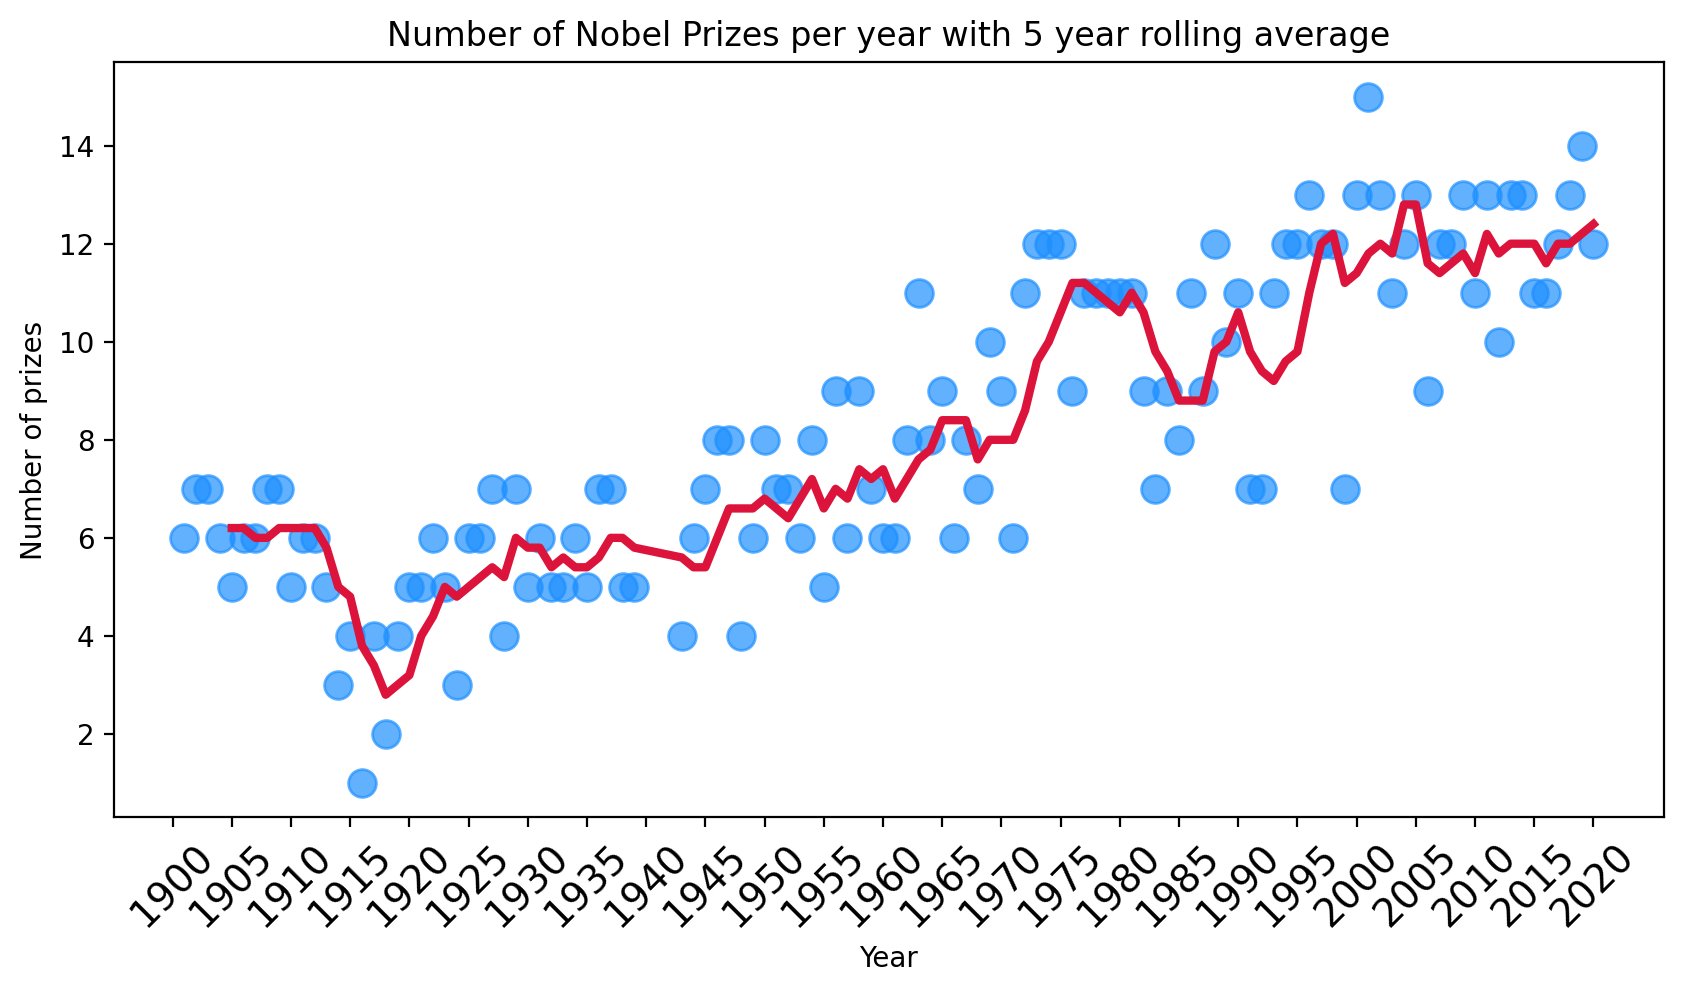

In [ ]:
plt.figure(figsize=(10,5), dpi=200)
plt.xticks(ticks=np.arange(1000, 2021, step=5),
           fontsize=14,
           rotation=45)

plt.scatter(df_year.index, df_year.values, c='dodgerblue', alpha=0.7, s=100)
plt.plot(df_year.index, df_year_avg.values, c='crimson', linewidth=3)

plt.xlabel('Year')
plt.ylabel('Number of prizes')
plt.title('Number of Nobel Prizes per year with 5 year rolling average')

plt.show()

# Are More Prizes Shared Than Before?


In [ ]:
df_data.head()
df_share = df_data.groupby('year').share_pct.sum()
df_share_avg = df_share / df_year
df_share_avg_rolling = df_share_avg.rolling(5).mean()
df_share_avg_rolling

year
1901    NaN
1902    NaN
1903    NaN
1904    NaN
1905   0.82
       ... 
2016   0.52
2017   0.50
2018   0.50
2019   0.50
2020   0.49
Length: 117, dtype: float64

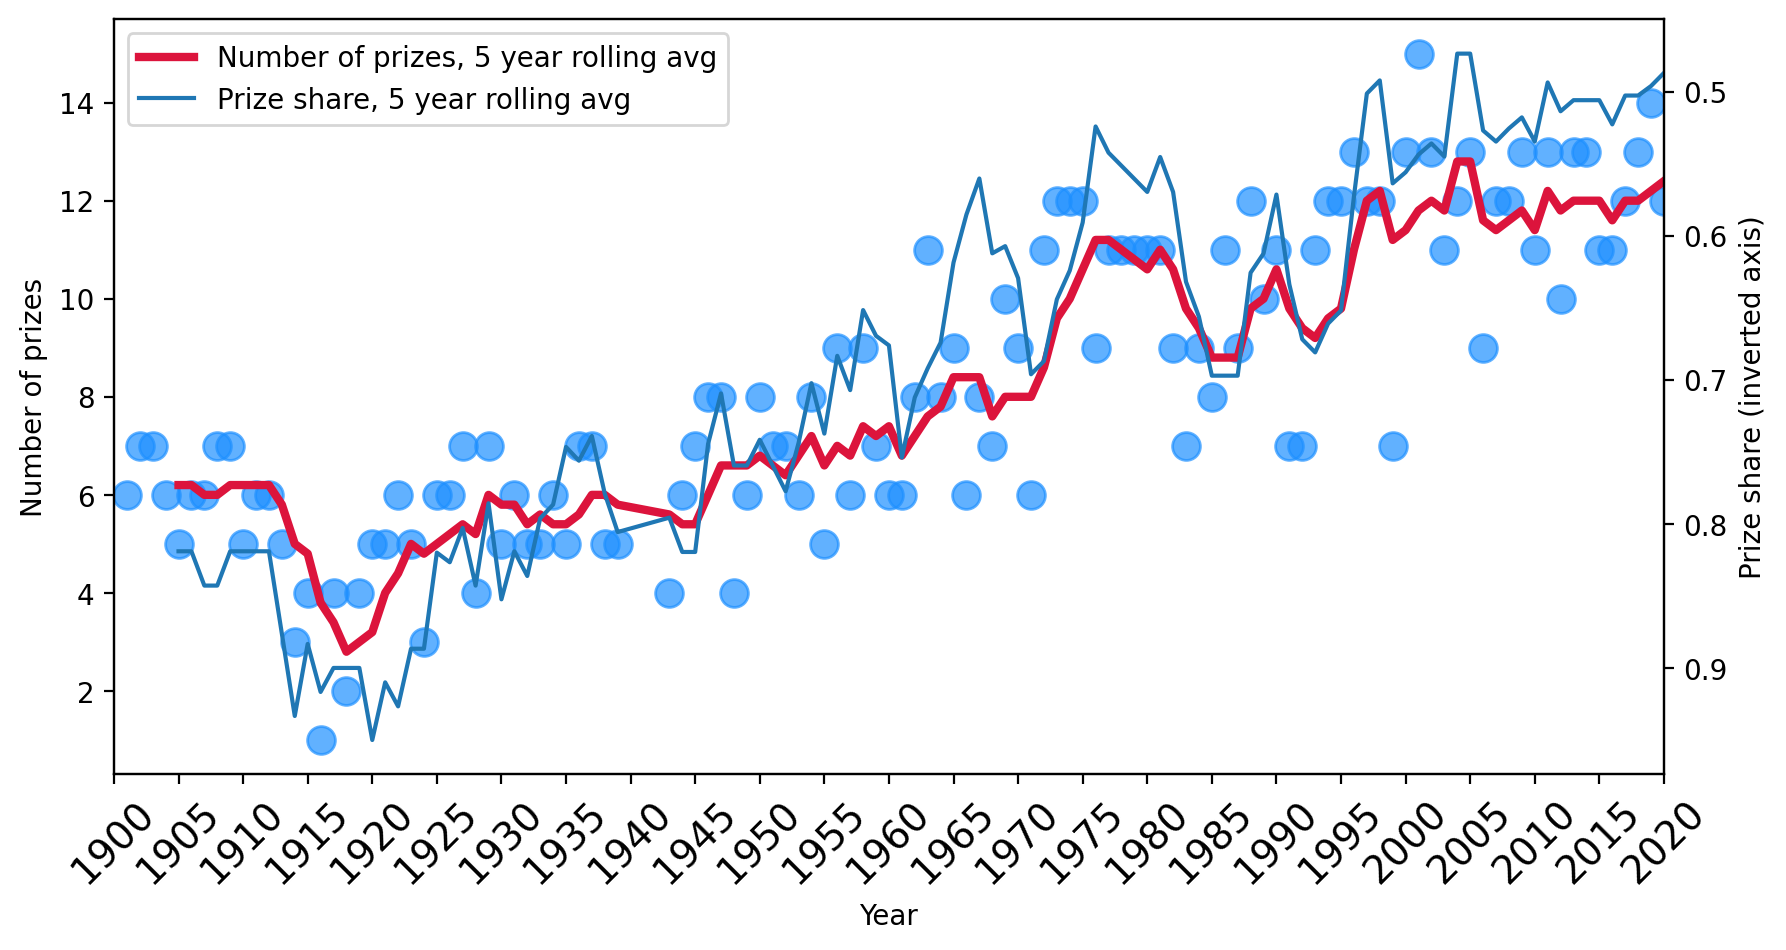

In [ ]:
plt.figure(figsize=(10,5), dpi=200)
plt.xticks(ticks=np.arange(1000, 2021, step=5),
           fontsize=14,
           rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.set_xlim(1900, 2020)
ax2.invert_yaxis()

ax1.scatter(df_year.index, df_year.values, c='dodgerblue', alpha=0.7, s=100)
line_1, = ax1.plot(df_year.index, df_year_avg.values, c='crimson', linewidth=3)

line_2, = ax2.plot(df_share_avg_rolling.index, df_share_avg_rolling.values)

ax1.set_ylabel('Number of prizes')
ax2.set_ylabel('Prize share (inverted axis)')
ax1.set_xlabel('Year')

plt.legend([line_1, line_2], ['Number of prizes, 5 year rolling avg', 'Prize share, 5 year rolling avg'])

plt.show()

# The Countries with the Most Nobel Prizes

What is the ranking for the top 20 countries in terms of the number of prizes?

In [ ]:
top20 = df_data.groupby(['birth_country_current'], as_index=False).prize.count()
top20_countries = pd.DataFrame(data=top20)
top20_countries.sort_values(by='prize', inplace=True, ascending=False)
top20 = top20_countries[:20].sort_values(by='prize')

In [ ]:
fig = px.bar(top20, x='prize', y='birth_country_current', orientation='h', 
             title='Top 20 Countries by number of Nobel Prizes',
             labels={
                 'birth_country_current': 'Country',
                 'prize': 'Number of prizes'
             })
fig.show()

# Using a Choropleth Map to Show the Number of Prizes Won by Country


In [ ]:
df_data.head()
countries = df_data.groupby(['ISO'], as_index=False).prize.count()
countries

ISO  prize
0   ARG      4
1   AUS     10
2   AUT     18
3   AZE      1
4   BEL      9
..  ...    ...
74  VEN      1
75  VNM      1
76  YEM      1
77  ZAF      9
78  ZWE      1

[79 rows x 2 columns]

In [ ]:
fig = px.choropleth(countries, locations='ISO', color='prize',
                    color_continuous_scale=px.colors.sequential.matter)
fig.show()

# In Which Categories are the Different Countries Winning Prizes? 


In [ ]:
df_category = df_data.groupby(['birth_country_current', 'category'], as_index=False).prize.count()
df_category

birth_country_current    category  prize
0                     Algeria  Literature      1
1                     Algeria     Physics      1
2                   Argentina    Medicine      2
3                   Argentina       Peace      2
4                   Australia   Chemistry      1
..                        ...         ...    ...
206  United States of America     Physics     70
207                 Venezuela    Medicine      1
208                   Vietnam       Peace      1
209                     Yemen       Peace      1
210                  Zimbabwe       Peace      1

[211 rows x 3 columns]

In [ ]:
merged_df = pd.merge(df_category, top20, on='birth_country_current')
merged_df.columns = ['birth_country_current', 'category', 'cat_prize', 'total_prize']
merged_df.sort_values(by='total_prize', inplace=True)
merged_df

birth_country_current    category  cat_prize  total_prize
85               South Africa       Peace          3            9
47                      India     Physics          1            9
46                      India       Peace          1            9
45                      India    Medicine          2            9
44                      India  Literature          2            9
..                        ...         ...        ...          ...
105  United States of America  Literature         10          281
107  United States of America       Peace         19          281
103  United States of America   Chemistry         55          281
104  United States of America   Economics         49          281
108  United States of America     Physics         70          281

[109 rows x 4 columns]

In [ ]:
country_bar = px.bar(x=merged_df.cat_prize,
                     y=merged_df.birth_country_current,
                     color=merged_df.category,
                     orientation='h')
country_bar.update_layout(yaxis={'categoryorder':'total ascending'})

country_bar.show()

### Number of Prizes Won by Each Country Over Time

In [ ]:
prize_by_year = df_data.groupby(['birth_country_current', 'year'], as_index=False).count()
prize_by_year = prize_by_year.sort_values('year')[['birth_country_current', 'year', 'prize']]
prize_by_year

birth_country_current  year  prize
118                    France  1901      2
346                    Poland  1901      1
159                   Germany  1901      1
312               Netherlands  1901      1
440               Switzerland  1901      1
..                        ...   ...    ...
31                    Austria  2019      1
221                   Germany  2020      1
622  United States of America  2020      7
533            United Kingdom  2020      2
158                    France  2020      1

[627 rows x 3 columns]

In [ ]:
cumulative_prizes = prize_by_year.groupby(['birth_country_current', 'year']).sum().groupby(level=[0]).cumsum()
cumulative_prizes.reset_index(inplace=True)
cumulative_prizes

birth_country_current  year  prize
0                     Algeria  1957      1
1                     Algeria  1997      2
2                   Argentina  1936      1
3                   Argentina  1947      2
4                   Argentina  1980      3
..                        ...   ...    ...
622  United States of America  2020    281
623                 Venezuela  1980      1
624                   Vietnam  1973      1
625                     Yemen  2011      1
626                  Zimbabwe  1960      1

[627 rows x 3 columns]

In [ ]:
lchart = px.bar(cumulative_prizes,
                x='year',
                y='prize',
                color='birth_country_current')

lchart.show()

# What are the Top Research Organisations?

In [ ]:
df_data.head()
df_org = df_data.groupby(['organization_name'], as_index=False).prize.count()
df_org.sort_values(by='prize', inplace=True)
df_org = df_org[-20:]
df_org

organization_name  prize
79                               Institut Pasteur      7
109                             London University      7
67                         Harvard Medical School      7
192                     University College London      7
40                             Cornell University      8
12                              Bell Laboratories      8
258                               Yale University      9
111           MRC Laboratory of Molecular Biology     10
222                          University of Oxford     12
152                        Rockefeller University     13
119                           Max-Planck-Institut     13
146                          Princeton University     15
38                            Columbia University     17
26   California Institute of Technology (Caltech)     17
197                       University of Cambridge     18
198                         University of Chicago     20
117   Massachusetts Institute of Technology (MIT)     21
167                           Stanford University     23
68                             Harvard University     29
196                      University of California     40

In [ ]:
chart = px.bar(df_org,
               x='prize',
               y='organization_name',
               orientation='h',
               height=500)

chart.show()

# Which Cities Make the Most Discoveries? 

In [ ]:
df_data.columns
df_city = df_data.groupby(['birth_city'], as_index=False).prize.count()
df_city.sort_values('prize', inplace=True)
df_cities = df_city[-20:]

In [ ]:
ch = px.bar(df_cities,
            x='prize',
            y='birth_city',
            height=1000)

ch.update_layout(xaxis_title='N of prizes',
                 yaxis_title='City')

ch.show()

# Where are Nobel Laureates Born? Chart the Laureate Birth Cities 

**Challenge**: 
* Create a plotly bar chart graphing the top 20 birth cities of Nobel laureates. 
* Use a named colour scale called `Plasma` for the chart.
* What percentage of the United States prizes came from Nobel laureates born in New York? 
* How many Nobel laureates were born in London, Paris and Vienna? 
* Out of the top 5 cities, how many are in the United States?


# Plotly Sunburst Chart: Combine Country, City, and Organisation

**Challenge**: 

* Create a DataFrame that groups the number of prizes by organisation. 
* Then use the [plotly documentation to create a sunburst chart](https://plotly.com/python/sunburst-charts/)
* Click around in your chart, what do you notice about Germany and France? 


Here's what you're aiming for:

<img src=https://i.imgur.com/cemX4m5.png width=300>



In [ ]:
country_org = df_data.groupby(['organization_country', 'organization_city', 'organization_name'], as_index=False).agg({'prize': pd.Series.count})
country_org.sort_values('prize', ascending=False, inplace=True)
country_org

organization_country     organization_city  \
205  United States of America         Cambridge, MA   
280  United States of America          Stanford, CA   
206  United States of America         Cambridge, MA   
209  United States of America           Chicago, IL   
195  United States of America          Berkeley, CA   
..                        ...                   ...   
110                     Japan               Sapporo   
111                     Japan                 Tokyo   
112                     Japan                 Tokyo   
113                     Japan                 Tokyo   
290  United States of America  Yorktown Heights, NY   

                               organization_name  prize  
205                           Harvard University     29  
280                          Stanford University     23  
206  Massachusetts Institute of Technology (MIT)     21  
209                        University of Chicago     20  
195                     University of California     19  
..                                           ...    ...  
110                          Hokkaido University      1  
111                      Asahi Kasei Corporation      1  
112                          Kitasato University      1  
113                Tokyo Institute of Technology      1  
290         IBM Thomas J. Watson Research Center      1  

[291 rows x 4 columns]

In [ ]:
burst = px.sunburst(country_org,
                    path=['organization_country', 'organization_city', 'organization_name'],
                    values='prize',
                    title='chwdp')

burst.show()

# Patterns in the Laureate Age at the Time of the Award

How Old Are the Laureates When the Win the Prize?

**Challenge**: Calculate the age of the laureate in the year of the ceremony and add this as a column called `winning_age` to the `df_data` DataFrame. Hint: you can use [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.html) to help you. 



In [ ]:
df_data['winning_age'] = df_data.year - df_data.birth_date.dt.year
df_data.head()

year    category                                           prize  \
0  1901   Chemistry               The Nobel Prize in Chemistry 1901   
1  1901  Literature              The Nobel Prize in Literature 1901   
2  1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3  1901       Peace                      The Nobel Peace Prize 1901   
4  1901       Peace                      The Nobel Peace Prize 1901   

                                          motivation prize_share  \
0  "in recognition of the extraordinary services ...         1/1   
1  "in special recognition of his poetic composit...         1/1   
2  "for his work on serum therapy, especially its...         1/1   
3                                                NaN         1/2   
4                                                NaN         1/2   

  laureate_type                     full_name birth_date         birth_city  \
0    Individual  Jacobus Henricus van 't Hoff 1852-08-30          Rotterdam   
1    Individual               Sully Prudhomme 1839-03-16              Paris   
2    Individual        Emil Adolf von Behring 1854-03-15  Hansdorf (Lawice)   
3    Individual                Frédéric Passy 1822-05-20              Paris   
4    Individual             Jean Henry Dunant 1828-05-08             Geneva   

      birth_country birth_country_current   sex   organization_name  \
0       Netherlands           Netherlands  Male   Berlin University   
1            France                France  Male                 NaN   
2  Prussia (Poland)                Poland  Male  Marburg University   
3            France                France  Male                 NaN   
4       Switzerland           Switzerland  Male                 NaN   

  organization_city organization_country  ISO  share_pct  winning_age  
0            Berlin              Germany  NLD       1.00        49.00  
1               NaN                  NaN  FRA       1.00        62.00  
2           Marburg              Germany  POL       1.00        47.00  
3               NaN                  NaN  FRA       0.50        79.00  
4               NaN                  NaN  CHE       0.50        73.00

### Who were the oldest and youngest winners?

**Challenge**: 
* What are the names of the youngest and oldest Nobel laureate? 
* What did they win the prize for?
* What is the average age of a winner?
* 75% of laureates are younger than what age when they receive the prize?
* Use Seaborn to [create histogram](https://seaborn.pydata.org/generated/seaborn.histplot.html) to visualise the distribution of laureate age at the time of winning. Experiment with the number of `bins` to see how the visualisation changes.

In [ ]:
df_data.loc[df_data.winning_age == df_data.winning_age.min()]
df_data.loc[df_data.winning_age == df_data.winning_age.max()]
df_data.winning_age.mean()
df_data.winning_age.describe()

count   934.00
mean     59.95
std      12.62
min      17.00
25%      51.00
50%      60.00
75%      69.00
max      97.00
Name: winning_age, dtype: float64

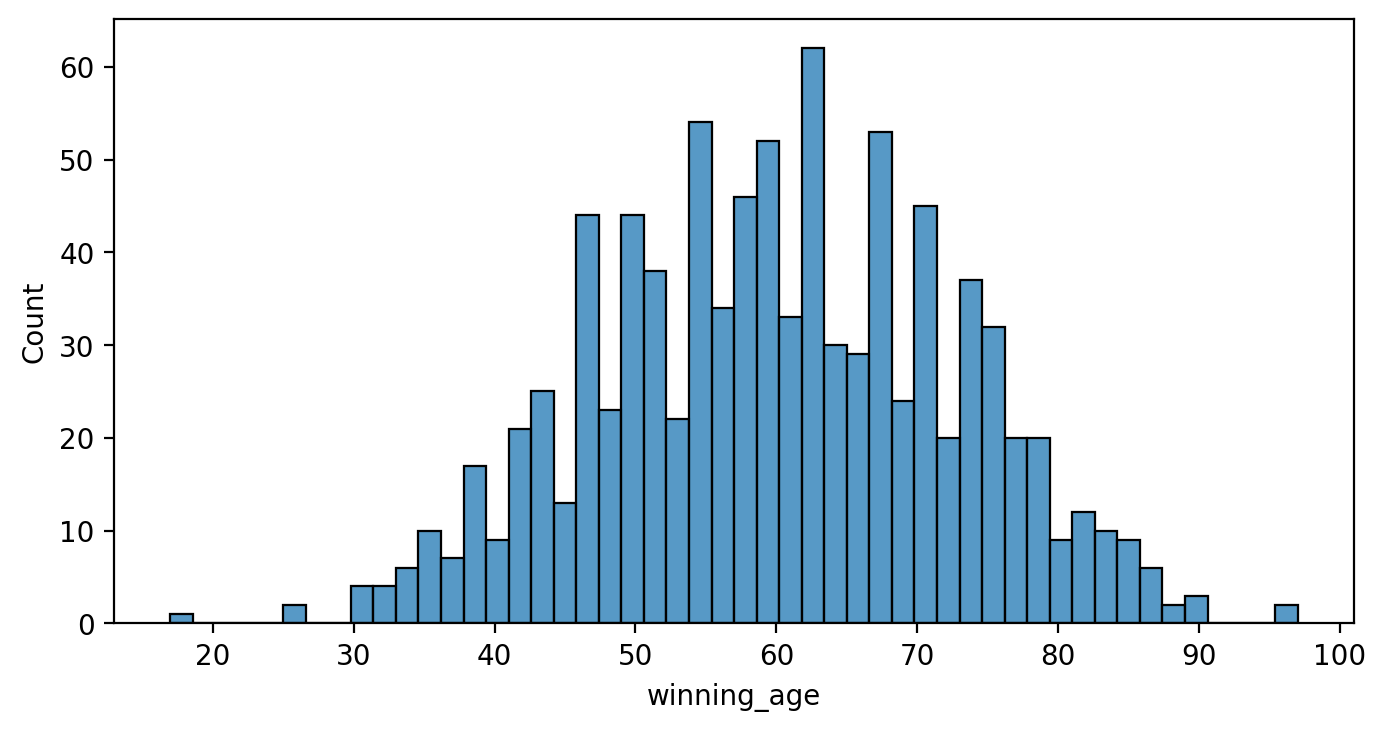

In [ ]:
plt.figure(figsize=(8,4), dpi=200)
sns.histplot(data=df_data,
             x=df_data.winning_age,
             bins=50)
plt.show()

### Descriptive Statistics for the Laureate Age at Time of Award

* Calculate the descriptive statistics for the age at the time of the award. 
* Then visualise the distribution in the form of a histogram using [Seaborn's .histplot() function](https://seaborn.pydata.org/generated/seaborn.histplot.html).
* Experiment with the `bin` size. Try 10, 20, 30, and 50.  

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



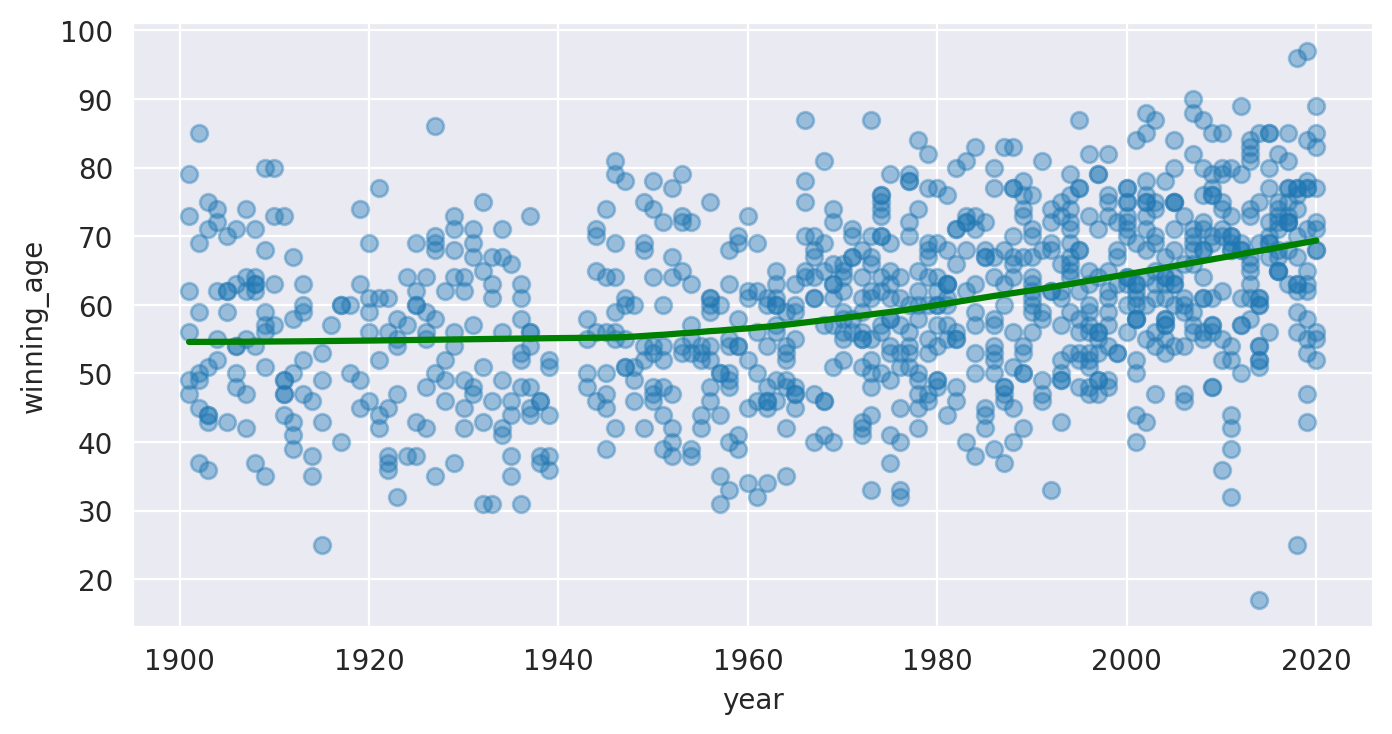

In [ ]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style('darkgrid'):
  sns.regplot(data=df_data,
              x='year',
              y='winning_age',
              lowess=True,
              scatter_kws={'alpha': 0.4},
              line_kws={'color': 'green'})
plt.show()

### Age at Time of Award throughout History

Are Nobel laureates being nominated later in life than before? Have the ages of laureates at the time of the award increased or decreased over time?

**Challenge**

* Use Seaborn to [create a .regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=regplot#seaborn.regplot) with a trendline.
* Set the `lowess` parameter to `True` to show a moving average of the linear fit.
* According to the best fit line, how old were Nobel laureates in the years 1900-1940 when they were awarded the prize?
* According to the best fit line, what age would it predict for a Nobel laureate in 2020?


### Winning Age Across the Nobel Prize Categories

How does the age of laureates vary by category? 

* Use Seaborn's [`.boxplot()`](https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot) to show how the mean, quartiles, max, and minimum values vary across categories. Which category has the longest "whiskers"? 
* In which prize category are the average winners the oldest?
* In which prize category are the average winners the youngest?

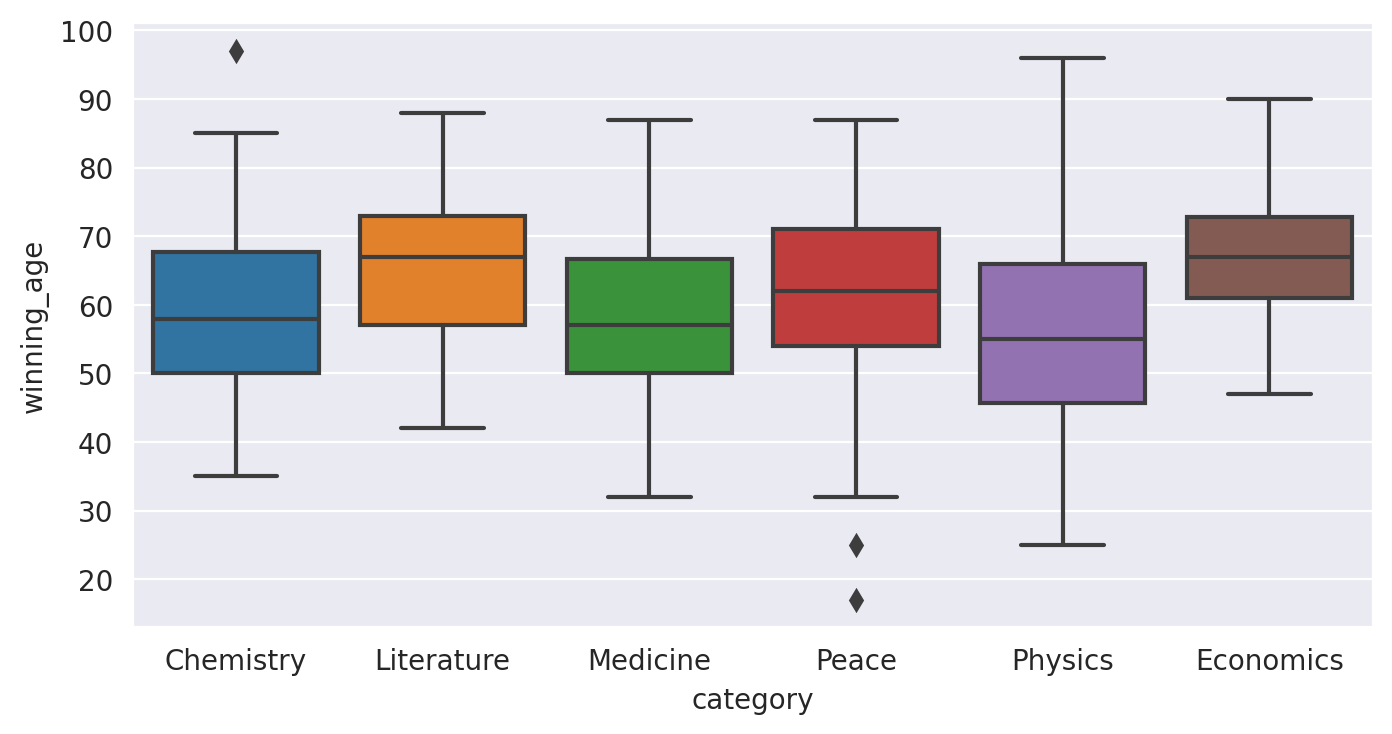

In [ ]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style('darkgrid'):
  sns.boxplot(data=df_data,
              x='category',
              y='winning_age')
  
plt.show()

**Challenge**
* Now use Seaborn's [`.lmplot()`](https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot) and the `row` parameter to create 6 separate charts for each prize category. Again set `lowess` to `True`.
* What are the winning age trends in each category? 
* Which category has the age trending up and which category has the age trending down? 
* Is this `.lmplot()` telling a different story from the `.boxplot()`?
* Create another chart with Seaborn. This time use `.lmplot()` to put all 6 categories on the same chart using the `hue` parameter. 


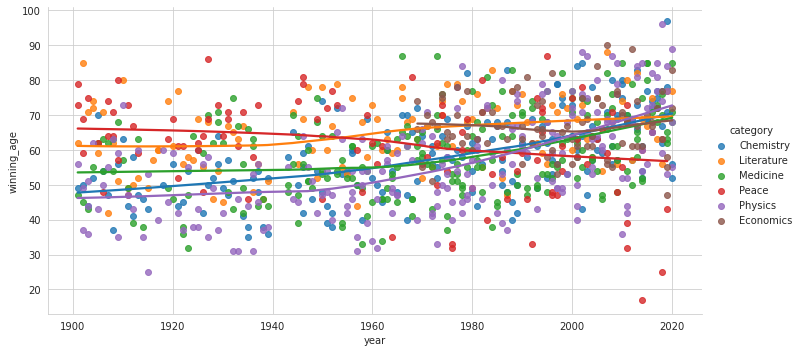

In [ ]:
with sns.axes_style('whitegrid'):
  sns.lmplot(data=df_data,
             x='year',
             y='winning_age',
             hue='category',
             lowess=True,
             aspect=2)

plt.show()